# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np
import pandas
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# Download the Excel file for local archiving.
from datetime import date
filename_LondonHousePrices = f"UK House price index.asof_{date.today()}.xlsx"
!curl --output "{filename_LondonHousePrices}" --location {url_LondonHousePrices}

# Lock it to prevent changes.
!chflags uchg "{filename_LondonHousePrices}"
print(filename_LondonHousePrices, "file is now locked (macOS)")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  566k  100  566k    0     0   282k      0  0:00:02  0:00:02 --:--:--  496k
UK House price index.asof_2023-02-25.xlsx file is now locked (macOS)


In [3]:
# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
properties = pd.read_excel(filename_LondonHousePrices, sheet_name='Average price', index_col=None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data**

Think about your pandas functions for checking out a dataframe. 

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [5]:
properties.shape

(337, 49)

In [6]:
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
332,2022-08-01,827996.60081,350239.35981,601931.6599,402667.50443,562407.51963,513498.76677,867930.22712,426105.46581,537220.87128,...,216321.72923,210137.55996,250337.29498,251926.80195,358295.87674,545608.08542,398893.43107,334116.32941,NaN,311435.11047
333,2022-09-01,827441.27622,349653.85502,605424.18481,403468.56545,584927.5386,515462.53348,857955.76149,432807.5594,540135.90519,...,218457.16,212196.46925,252252.9242,254389.50251,361500.40182,546005.12615,402606.92676,335743.93622,NaN,313884.51408
334,2022-10-01,870799.60044,355290.62346,597777.32861,409719.69933,578010.59307,522979.73425,841595.77335,434228.2722,541818.73318,...,220006.64656,212847.74493,252682.94085,256453.07431,362314.62574,539975.01492,403471.00209,337487.67124,NaN,314711.79602
335,2022-11-01,948073.2088,359495.10689,587967.70766,410407.63764,572262.24808,523810.59406,838162.23572,432216.9619,543594.15108,...,221431.98186,213389.07508,254952.86288,256139.51979,366771.68741,542910.65717,402652.10802,336748.30059,NaN,315695.90027
336,2022-12-01,968059.9863,362054.07567,595486.30411,416059.80994,566794.73925,523364.68872,842166.73612,430255.62154,548033.94229,...,221100.65258,214772.92559,256158.76167,256206.15838,363779.44643,543098.82276,404228.91584,330601.04469,NaN,315119.06969


In [7]:
properties_latest = properties.tail(1).melt(id_vars='Unnamed: 0',
                                            var_name='Borough',
                                            value_name='Average price')

print("Highest current values:")
print(properties_latest.sort_values('Average price', ascending=False).head())

Highest current values:
   Unnamed: 0               Borough Average price
19 2022-12-01  Kensington & Chelsea  1278176.3339
0  2022-12-01        City of London   968059.9863
32 2022-12-01           Westminster  910286.63571
6  2022-12-01                Camden  842166.73612
26 2022-12-01  Richmond upon Thames  742060.80162


In [8]:
print("Lowest current values:")
print(properties_latest.sort_values('Average price').head())

Lowest current values:
   Unnamed: 0             Borough Average price
37 2022-12-01          NORTH EAST   163730.7543
39 2022-12-01  YORKS & THE HUMBER  214772.92559
38 2022-12-01          NORTH WEST  221100.65258
40 2022-12-01       EAST MIDLANDS  256158.76167
41 2022-12-01       WEST MIDLANDS  256206.15838


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [9]:
properties_T = properties.transpose()
properties_T

,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925
Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,81440.43008,...,480229.23775,486445.91707,491230.70286,502416.10181,505704.35059,513498.76677,515462.53348,522979.73425,523810.59406,523364.68872
Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,120596.8511,...,878783.32113,876168.6135,852187.89719,837088.91944,851866.72294,867930.22712,857955.76149,841595.77335,838162.23572,842166.73612
Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,69393.50023,...,408738.26012,411366.37096,414231.90527,414210.06504,418634.18288,426105.46581,432807.5594,434228.2722,432216.9619,430255.62154
Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,82011.08271,...,513959.33601,511611.95205,515576.7603,524252.45609,534093.61223,537220.87128,540135.90519,541818.73318,543594.15108,548033.94229


In [10]:
properties_T_reset = properties_T.reset_index()
properties_T_reset

,index,0,1,2,3,4,5,6,7,8,...,327,328,329,330,331,332,333,334,335,336
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,480229.23775,486445.91707,491230.70286,502416.10181,505704.35059,513498.76677,515462.53348,522979.73425,523810.59406,523364.68872
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,878783.32113,876168.6135,852187.89719,837088.91944,851866.72294,867930.22712,857955.76149,841595.77335,838162.23572,842166.73612
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,408738.26012,411366.37096,414231.90527,414210.06504,418634.18288,426105.46581,432807.5594,434228.2722,432216.9619,430255.62154
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,513959.33601,511611.95205,515576.7603,524252.45609,534093.61223,537220.87128,540135.90519,541818.73318,543594.15108,548033.94229


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [11]:
properties_T_reset2 = properties_T_reset.copy()
properties_T_reset2.columns = properties_T_reset.loc[0]
properties_T_reset2.drop(labels=0, inplace=True)
properties_T_reset2

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,480229.23775,486445.91707,491230.70286,502416.10181,505704.35059,513498.76677,515462.53348,522979.73425,523810.59406,523364.68872
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,878783.32113,876168.6135,852187.89719,837088.91944,851866.72294,867930.22712,857955.76149,841595.77335,838162.23572,842166.73612
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,408738.26012,411366.37096,414231.90527,414210.06504,418634.18288,426105.46581,432807.5594,434228.2722,432216.9619,430255.62154
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,513959.33601,511611.95205,515576.7603,524252.45609,534093.61223,537220.87128,540135.90519,541818.73318,543594.15108,548033.94229
10,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,435475.04961,441737.73847,447982.18283,447714.99777,448574.16678,453344.84583,458004.59535,465140.15651,466256.58204,469586.55163


In [12]:
properties_T_renamed = properties_T_reset2.rename(columns=
                                                  {"Unnamed: 0":"borough", pd.NaT:"ID"}
                                                 )
properties_T_renamed

,borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,480229.23775,486445.91707,491230.70286,502416.10181,505704.35059,513498.76677,515462.53348,522979.73425,523810.59406,523364.68872
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,878783.32113,876168.6135,852187.89719,837088.91944,851866.72294,867930.22712,857955.76149,841595.77335,838162.23572,842166.73612
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,408738.26012,411366.37096,414231.90527,414210.06504,418634.18288,426105.46581,432807.5594,434228.2722,432216.9619,430255.62154
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,513959.33601,511611.95205,515576.7603,524252.45609,534093.61223,537220.87128,540135.90519,541818.73318,543594.15108,548033.94229
10,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,435475.04961,441737.73847,447982.18283,447714.99777,448574.16678,453344.84583,458004.59535,465140.15651,466256.58204,469586.55163


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [13]:
properties_melt = properties_T_renamed.melt(id_vars=["ID", "borough"],
                                           var_name="date",
                                           value_name="average price")

properties_melt

,ID,borough,date,average price
0,E09000001,City of London,1995-01-01,91448.98487
1,E09000002,Barking & Dagenham,1995-01-01,50460.2266
2,E09000003,Barnet,1995-01-01,93284.51832
3,E09000004,Bexley,1995-01-01,64958.09036
4,E09000005,Brent,1995-01-01,71306.56698
...,...,...,...,...
16123,E12000007,LONDON,2022-12-01,543098.82276
16124,E12000008,SOUTH EAST,2022-12-01,404228.91584
16125,E12000009,SOUTH WEST,2022-12-01,330601.04469
16126,NaN,Unnamed: 47,2022-12-01,NaN


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [14]:
properties_melt.dtypes

ID                       object
borough                  object
date             datetime64[ns]
average price            object
dtype: object

In [15]:
properties_melt_float = properties_melt.drop(columns='average price')
properties_melt_float['average price'] = properties_melt['average price'].apply(float)
properties_melt_float.dtypes

ID                       object
borough                  object
date             datetime64[ns]
average price           float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [16]:
print(set(properties_melt_float['borough']))

{'Waltham Forest', 'Barnet', 'LONDON', 'Newham', 'England', 'Unnamed: 37', 'WEST MIDLANDS', 'SOUTH WEST', 'Redbridge', 'Sutton', 'Barking & Dagenham', 'Hillingdon', 'Lewisham', 'Hounslow', 'Wandsworth', 'SOUTH EAST', 'Unnamed: 34', 'Harrow', 'Havering', 'Islington', 'Kensington & Chelsea', 'Merton', 'Richmond upon Thames', 'Unnamed: 47', 'Bexley', 'Enfield', 'Hackney', 'Hammersmith & Fulham', 'Brent', 'Bromley', 'Croydon', 'Lambeth', 'Greenwich', 'Camden', 'Tower Hamlets', 'NORTH WEST', 'Haringey', 'NORTH EAST', 'EAST MIDLANDS', 'City of London', 'EAST OF ENGLAND', 'Ealing', 'Inner London', 'YORKS & THE HUMBER', 'Outer London', 'Kingston upon Thames', 'Southwark', 'Westminster'}


In [153]:
properties_melt_float.value_counts('borough').describe()

count     48.0
mean     336.0
std        0.0
min      336.0
25%      336.0
50%      336.0
75%      336.0
max      336.0
dtype: float64

In [17]:
# Extract municipality IDs
IDs = properties_T.loc[:, 0]
IDs

Unnamed: 0                    NaT
City of London          E09000001
Barking & Dagenham      E09000002
Barnet                  E09000003
Bexley                  E09000004
Brent                   E09000005
Bromley                 E09000006
Camden                  E09000007
Croydon                 E09000008
Ealing                  E09000009
Enfield                 E09000010
Greenwich               E09000011
Hackney                 E09000012
Hammersmith & Fulham    E09000013
Haringey                E09000014
Harrow                  E09000015
Havering                E09000016
Hillingdon              E09000017
Hounslow                E09000018
Islington               E09000019
Kensington & Chelsea    E09000020
Kingston upon Thames    E09000021
Lambeth                 E09000022
Lewisham                E09000023
Merton                  E09000024
Newham                  E09000025
Redbridge               E09000026
Richmond upon Thames    E09000027
Southwark               E09000028
Sutton        

In [18]:
valid_IDs = IDs[IDs.notna()]
valid_IDs

City of London          E09000001
Barking & Dagenham      E09000002
Barnet                  E09000003
Bexley                  E09000004
Brent                   E09000005
Bromley                 E09000006
Camden                  E09000007
Croydon                 E09000008
Ealing                  E09000009
Enfield                 E09000010
Greenwich               E09000011
Hackney                 E09000012
Hammersmith & Fulham    E09000013
Haringey                E09000014
Harrow                  E09000015
Havering                E09000016
Hillingdon              E09000017
Hounslow                E09000018
Islington               E09000019
Kensington & Chelsea    E09000020
Kingston upon Thames    E09000021
Lambeth                 E09000022
Lewisham                E09000023
Merton                  E09000024
Newham                  E09000025
Redbridge               E09000026
Richmond upon Thames    E09000027
Southwark               E09000028
Sutton                  E09000029
Tower Hamlets 

In [19]:
# Keep all municipalities in London (except 'City of London' which is not a borough).
borough_IDs = valid_IDs[np.logical_and(valid_IDs != IDs['City of London'],
                                       valid_IDs.str.startswith("E09"))]

london_boroughs = list(borough_IDs.index)
print(f"London's {len(london_boroughs)} boroughs: {', '.join(london_boroughs)}.")

London's 32 boroughs: Barking & Dagenham, Barnet, Bexley, Brent, Bromley, Camden, Croydon, Ealing, Enfield, Greenwich, Hackney, Hammersmith & Fulham, Haringey, Harrow, Havering, Hillingdon, Hounslow, Islington, Kensington & Chelsea, Kingston upon Thames, Lambeth, Lewisham, Merton, Newham, Redbridge, Richmond upon Thames, Southwark, Sutton, Tower Hamlets, Waltham Forest, Wandsworth, Westminster.


In [20]:
london_properties = properties_melt_float[
                                          properties_melt_float['ID'].isin(borough_IDs)
                                          ].drop(columns='ID')
london_properties

,borough,date,average price
1,Barking & Dagenham,1995-01-01,50460.22660
2,Barnet,1995-01-01,93284.51832
3,Bexley,1995-01-01,64958.09036
4,Brent,1995-01-01,71306.56698
5,Bromley,1995-01-01,81671.47692
...,...,...,...
16108,Sutton,2022-12-01,450999.68080
16109,Tower Hamlets,2022-12-01,520524.72039
16110,Waltham Forest,2022-12-01,510178.70953
16111,Wandsworth,2022-12-01,657123.47553


In [21]:
# Check for missing values:
london_properties.isna().any()

borough          False
date             False
average price    False
dtype: bool

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

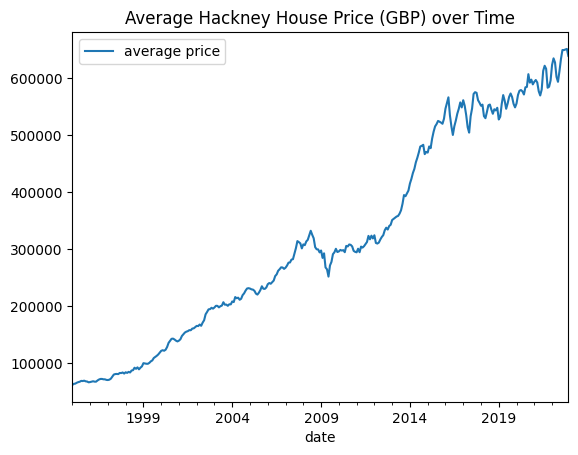

In [231]:
hackney_properties = london_properties.query("borough == 'Hackney'")
hackney_properties.plot(y="average price", x="date")
plt.title("Average Hackney House Price (GBP) over Time")
plt.show()

In [23]:
colors = london_properties['borough'].apply(hash)

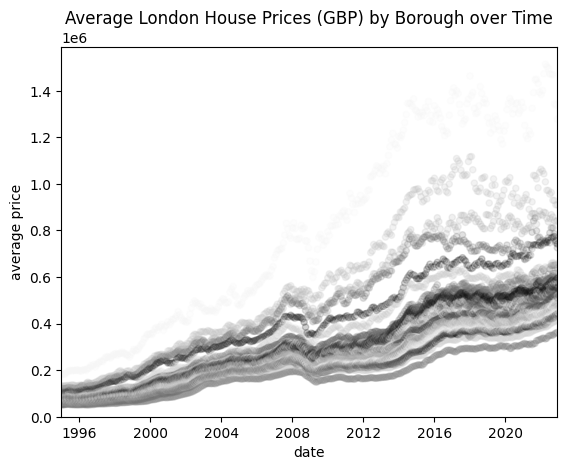

In [24]:
london_properties.plot(y="average price", x="date", kind='scatter', c=colors, alpha=0.2)
plt.title("Average London House Prices (GBP) by Borough over Time")
plt.margins(x=0)
plt.ylim(0)
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column.

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [25]:
london_properties['year'] = london_properties['date'].apply(lambda x: x.year)
london_properties

,borough,date,average price,year
1,Barking & Dagenham,1995-01-01,50460.22660,1995
2,Barnet,1995-01-01,93284.51832,1995
3,Bexley,1995-01-01,64958.09036,1995
4,Brent,1995-01-01,71306.56698,1995
5,Bromley,1995-01-01,81671.47692,1995
...,...,...,...,...
16108,Sutton,2022-12-01,450999.68080,2022
16109,Tower Hamlets,2022-12-01,520524.72039,2022
16110,Waltham Forest,2022-12-01,510178.70953,2022
16111,Wandsworth,2022-12-01,657123.47553,2022


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [143]:
# Before averaging over the years, Ensure that each year has the same amount of data.
london_properties.value_counts('year', dropna=False).describe()

count     28.0
mean     384.0
std        0.0
min      384.0
25%      384.0
50%      384.0
75%      384.0
max      384.0
dtype: float64

In [158]:
(yearly := london_properties
          .pivot_table(values='average price', index=['borough', 'year'],  aggfunc=np.mean)
          .rename(columns={"average price":"mean price"})
          .reset_index()
          )

,borough,year,mean price
0,Barking & Dagenham,1995,5.181797e+04
1,Barking & Dagenham,1996,5.171819e+04
2,Barking & Dagenham,1997,5.597426e+04
3,Barking & Dagenham,1998,6.028582e+04
4,Barking & Dagenham,1999,6.532093e+04
...,...,...,...
891,Westminster,2018,1.020025e+06
892,Westminster,2019,9.559986e+05
893,Westminster,2020,9.604692e+05
894,Westminster,2021,9.627774e+05


In [167]:
yearly_colors = yearly.borough.apply(hash)

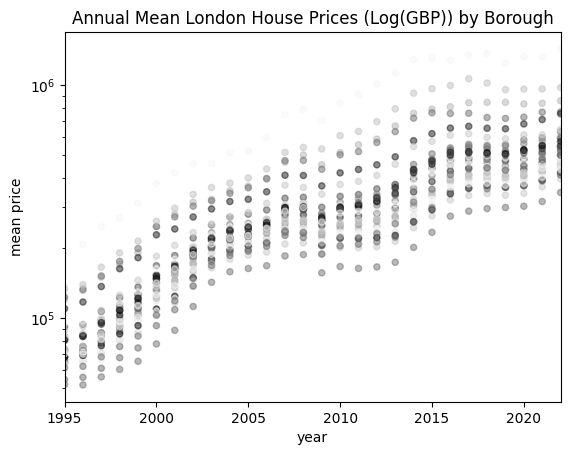

In [183]:
yearly.plot(x="year", y="mean price", kind='scatter', c=yearly_colors, alpha=0.5)
plt.title("Annual Mean London House Prices (Log(GBP)) by Borough")
plt.margins(x=0)
plt.yscale('log')
plt.show()

In [27]:
years = [yearly['year'].max()]
years += [years[0] - 20]

In [34]:
def comparison(years, yearly):
    yearlies = [yearly[yearly['year'] == y] for y in years]
    suffixes = [" " + str(y) for y in years]
    result = pd.merge(*yearlies, on='borough', suffixes=suffixes)
    result.drop(columns=[f"year {y}" for y in years], inplace=True)

    ratio_name = f"House Price Ratio {years[0]}/{years[1]}"
    result[ratio_name] = result.iloc[:, -2] / result.iloc[:, -1]

    increase = (result.iloc[:, -2] - result.iloc[:, -1])
    result['Absolute Increase (kGBP)'] = np.array(round(increase/1000), dtype=int)
    return result.sort_values(ratio_name, ascending=False)


twenty_year_comparison = comparison(years, yearly)
twenty_year_comparison

,borough,mean price 2022,mean price 2002,House Price Ratio 2022/2002,Absolute Increase (kGBP)
10,Hackney,6.307251e+05,180269.456333,3.498790,180
29,Waltham Forest,4.999456e+05,148137.483958,3.374876,148
21,Lewisham,4.558476e+05,143764.029800,3.170804,144
18,Kensington & Chelsea,1.428918e+06,460382.450483,3.103762,460
0,Barking & Dagenham,3.459238e+05,112221.912482,3.082498,112
12,Haringey,5.970346e+05,195801.255092,3.049187,196
23,Newham,4.115391e+05,137455.635925,2.993978,137
26,Southwark,5.431219e+05,184684.204442,2.940814,185
3,Brent,5.453539e+05,185898.147992,2.933616,186
22,Merton,5.718391e+05,195714.692417,2.921800,196


<AxesSubplot: xlabel='borough'>

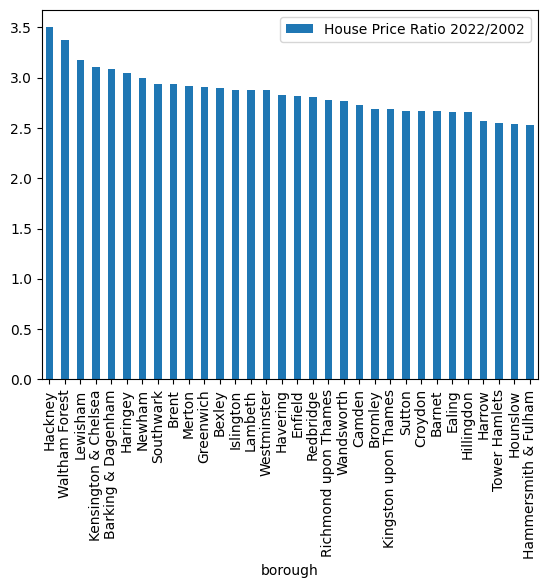

In [29]:
twenty_year_comparison.plot(kind='bar', y="House Price Ratio 2022/2002", x='borough')

<AxesSubplot: xlabel='borough'>

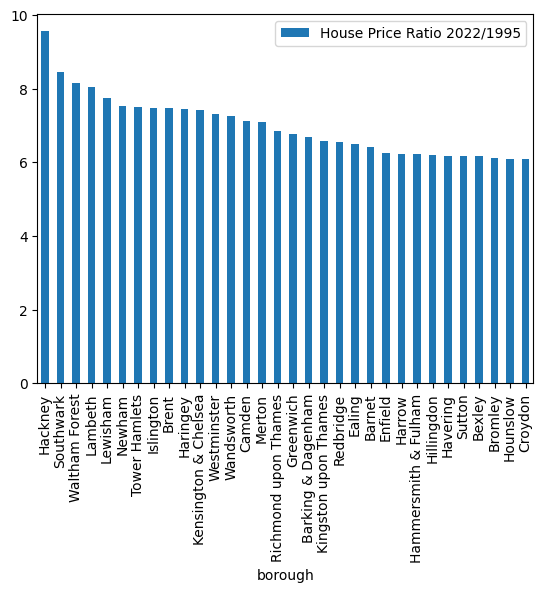

In [30]:
twenty_seven_year_comparison = comparison((2022, 1995), yearly)
twenty_seven_year_comparison.plot(kind='bar', y="House Price Ratio 2022/1995", x='borough')

<AxesSubplot: xlabel='mean price 1995', ylabel='House Price Ratio 2022/1995'>

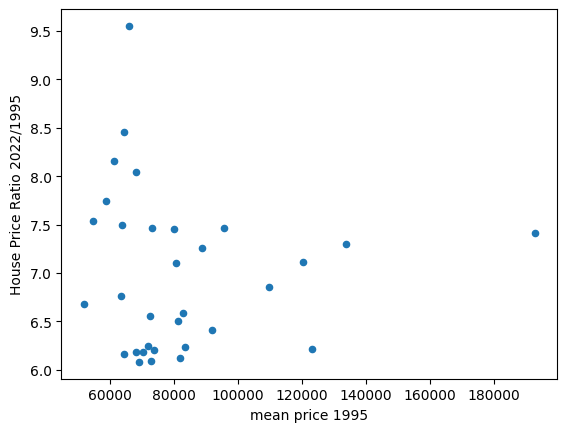

In [31]:
twenty_seven_year_comparison.plot(kind='scatter', y="House Price Ratio 2022/1995", x="mean price 1995")

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course!

In [115]:
# Reformat column names and add columns of rounded values based on existing float-typed columns.
# The walrus assignment (:=) display of the result in IPython/Jupyter.
df = twenty_year_comparison
(df := twenty_year_comparison
        .assign(**{(k+'_Rounded'): lambda df_, col=k:df_[col].round().astype('int')
                    for k in df.columns
                    if df[k].dtype == float})
        .rename(columns=lambda c: c.title().replace(' ', '_'))
)  # These outer parens are necessary for both the walrus and multi-line method chain!

,Borough,Mean_Price_2022,Mean_Price_2002,House_Price_Ratio_2022/2002,Absolute_Increase_(Kgbp),Mean_Price_2022_Rounded,Mean_Price_2002_Rounded,House_Price_Ratio_2022/2002_Rounded
10,Hackney,6.307251e+05,180269.456333,3.498790,180,630725,180269,3
29,Waltham Forest,4.999456e+05,148137.483958,3.374876,148,499946,148137,3
21,Lewisham,4.558476e+05,143764.029800,3.170804,144,455848,143764,3
18,Kensington & Chelsea,1.428918e+06,460382.450483,3.103762,460,1428918,460382,3
0,Barking & Dagenham,3.459238e+05,112221.912482,3.082498,112,345924,112222,3
12,Haringey,5.970346e+05,195801.255092,3.049187,196,597035,195801,3
23,Newham,4.115391e+05,137455.635925,2.993978,137,411539,137456,3
26,Southwark,5.431219e+05,184684.204442,2.940814,185,543122,184684,3
3,Brent,5.453539e+05,185898.147992,2.933616,186,545354,185898,3
22,Merton,5.718391e+05,195714.692417,2.921800,196,571839,195715,3


```df_nonsense = twenty_year_comparison
(df_nonsense := twenty_year_comparison
 .foosomeotherfunction
 .pipe(pd.merge_ordered, right=twenty_year_comparison, left_on='Borough', right_on='borough')
 )
# The pipe method above sends the intermediate result as the first argument to
# pd.merge_ordered, followed by the subsequent named parameters.```

In [116]:
df.memory_usage(deep=True)

Index                                   256
Borough                                2136
Mean_Price_2022                         256
Mean_Price_2002                         256
House_Price_Ratio_2022/2002             256
Absolute_Increase_(Kgbp)                256
Mean_Price_2022_Rounded                 256
Mean_Price_2002_Rounded                 256
House_Price_Ratio_2022/2002_Rounded     256
dtype: int64

In [135]:
(df.select_dtypes('float')
   .describe()
 )

,Mean_Price_2022,Mean_Price_2002,House_Price_Ratio_2022/2002
count,3.200000e+01,32.000000,32.000000
mean,5.743285e+05,202233.242946,2.847448
std,2.098716e+05,70694.186645,0.229222
min,3.459238e+05,112221.912482,2.533943
25%,4.483707e+05,159098.992998,2.671441
50%,5.245944e+05,186272.095604,2.823290
75%,6.054572e+05,207515.189737,2.935416
max,1.428918e+06,460382.450483,3.498790


In [134]:
for dtype in [np.uint8, np.int8, np.int16]:
    print(np.iinfo(dtype))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [184]:
london_properties

,borough,date,average price,year
1,Barking & Dagenham,1995-01-01,50460.22660,1995
2,Barnet,1995-01-01,93284.51832,1995
3,Bexley,1995-01-01,64958.09036,1995
4,Brent,1995-01-01,71306.56698,1995
5,Bromley,1995-01-01,81671.47692,1995
...,...,...,...,...
16108,Sutton,2022-12-01,450999.68080,2022
16109,Tower Hamlets,2022-12-01,520524.72039,2022
16110,Waltham Forest,2022-12-01,510178.70953,2022
16111,Wandsworth,2022-12-01,657123.47553,2022


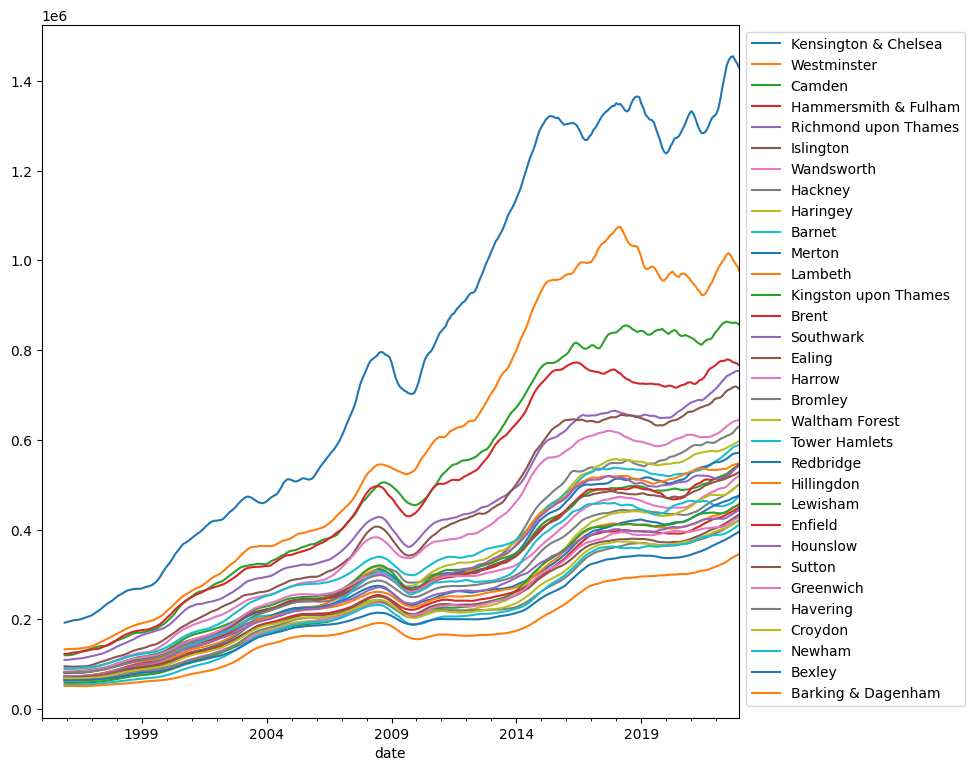

In [230]:
(london_properties
    .drop(columns='year')
    .groupby(['date', 'borough'])
    .mean()
    .unstack()  # move borough sub-index to columns
    .droplevel(0, axis='columns')
    .rolling(12)  # 12-month rolling average
    .mean()
    .sort_values(by=london_properties['date'].max(), axis='columns', ascending=False)
    .plot(figsize=(9,9))
    .legend(bbox_to_anchor=(1,1))
)

***Markdown syntax test***

`__dunder\_\_` yields:
__dunder\_\_

`__bolded__` yields same as `**bolded**`:
__bolded__